<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2002%20-%20Aprendizado%20Supervisionado/Extras/Kaggle_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle Datasets

Neste tutorial é ilustrado como utilizar datasets do kaggle direto no colab.

Para tal, utilizamos a api do Kaggle

In [11]:
! pip install -q kaggle
from google.colab import files

Na célula abaixo, você deve fazer o upload do seu token de conta do Kaggle. Você pode obter em Kaggles-> My Accounts -> Create API Token, como ilustra a Figura abaixo 

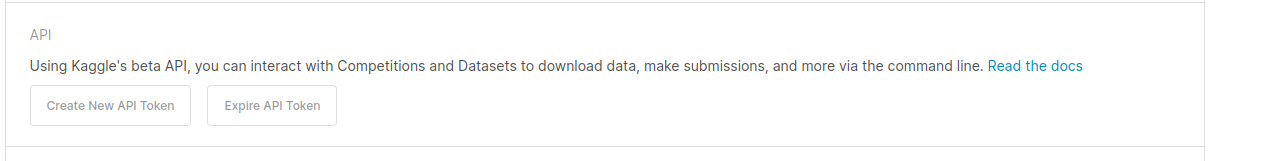

In [12]:
files.upload()

{}

In [13]:
! chmod 600 /root/.kaggle/kaggle.json

In [14]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zusmani/pakistan-toshakhana-files                                  Pakistan ToshaKhana Files                             1MB  2023-03-15 16:25:43           2418        118  1.0              
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                  10KB  2023-03-10 15:39:14           1515         48  1.0              
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                      8KB  2023-02-01 12:22:51          15070        484  1.0              
datascientistanna/customers-dataset          

Para obter um dataset, voce pode escolher da lista ou do site do Kaggle e inserir o link tal qual a célula abaixo:

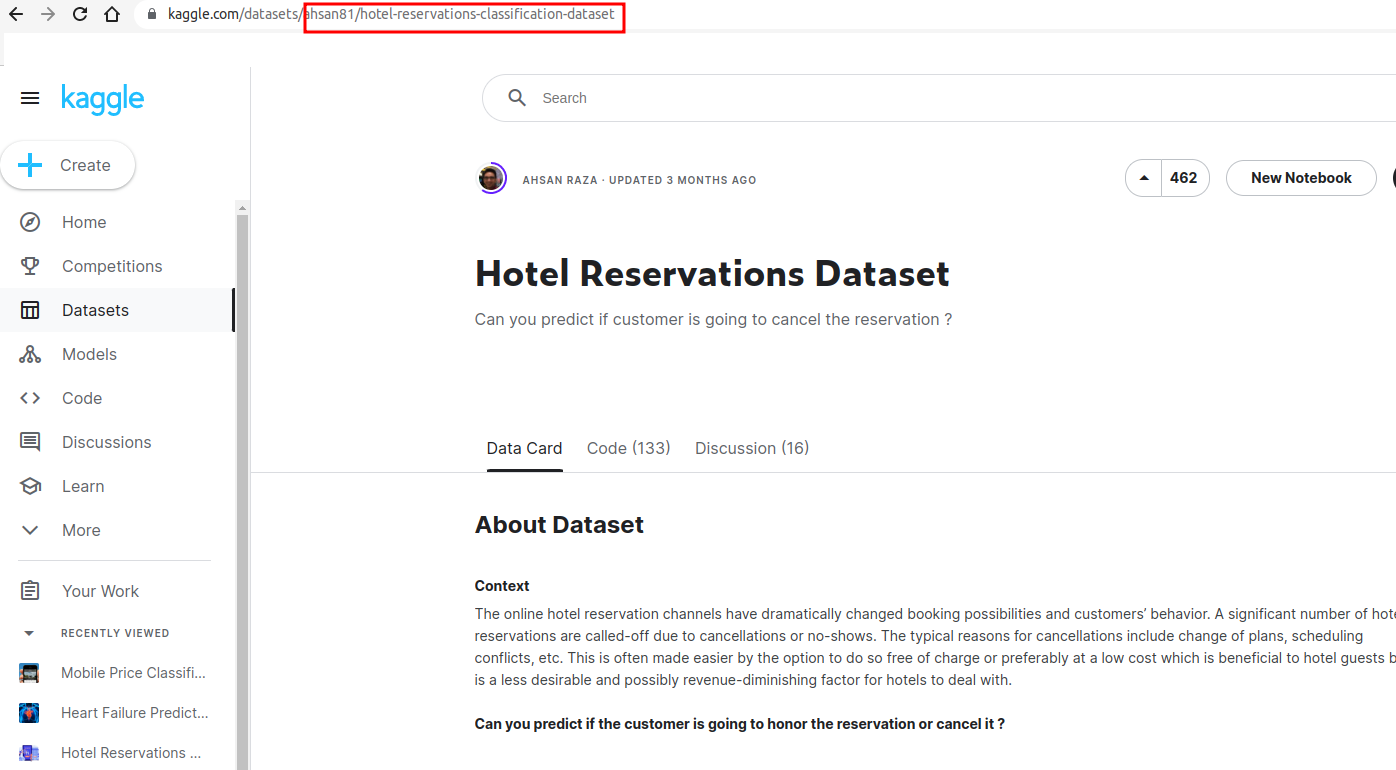

In [16]:
!kaggle datasets download 'ahsan81/hotel-reservations-classification-dataset'


hotel-reservations-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
!unzip hotel-reservations-classification-dataset.zip

Archive:  hotel-reservations-classification-dataset.zip
replace Hotel Reservations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Hotel Reservations.csv  


A partir de agora, temos o csv do dataset, e então seguimos com o pipeline das aulas passadas

In [18]:
import pandas as pd

df = pd.read_csv('Hotel Reservations.csv')


In [19]:
df.head(20)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


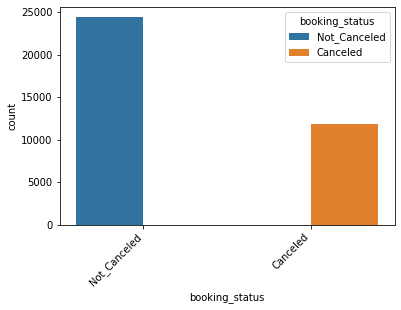

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='booking_status',hue='booking_status')
plt.xticks(rotation=45, ha='right');

In [27]:
#Aqui removemos o BookingID por não julgar necessário com feature. O booking_status por sua vez é label
X = df.drop(['Booking_ID','booking_status'], axis=1).values
y = df['booking_status'].values
print(X.shape)
print(y.shape)

(36275, 17)
(36275,)


In [28]:
print(X[1])
print(y[1])

[2 0 2 3 'Not Selected' 0 'Room_Type 1' 5 2018 11 6 'Online' 0 0 0 106.68
 1]
Not_Canceled


Abaixo, processamos as features categoricas

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

#Transforma as colunas 4,6,11 (categoricas) para one-hot
columns_to_encode = [4, 6, 11]

encoder = OneHotEncoder(sparse=False, categories='auto')
encoded_columns = encoder.fit_transform(X[:, columns_to_encode])


X = np.delete(X, columns_to_encode, axis=1)
X = np.concatenate((X, encoded_columns), axis=1)

y = LabelEncoder().fit_transform(y)

print(X.shape)
print(y.shape)

print(X[1])
print(y[1])



(36275, 30)
(36275,)
[2 0 2 3 0 5 2018 11 6 0 0 0 106.68 1 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
1


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


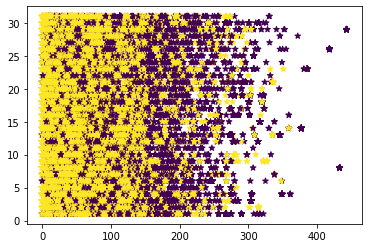

In [30]:
plt.scatter(X[:, 5], X[:,8], c=y, marker="*");
plt.show()

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9999
)

#model = GaussianNB()
model = DecisionTreeClassifier()
#model = KNeighborsClassifier()


model.fit(X_train, y_train);
y_pred = model.predict(X_train)

report = classification_report(y_train,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8035
           1       1.00      1.00      1.00     16269

    accuracy                           0.99     24304
   macro avg       0.99      0.99      0.99     24304
weighted avg       0.99      0.99      0.99     24304



              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3850
           1       0.91      0.90      0.90      8121

    accuracy                           0.87     11971
   macro avg       0.85      0.85      0.85     11971
weighted avg       0.87      0.87      0.87     11971



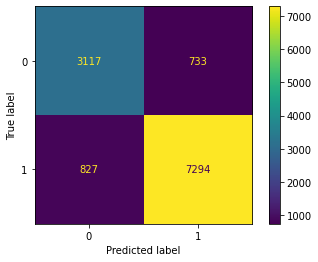

In [32]:
y_pred = model.predict(X_test)

report = classification_report(y_test,y_pred)
print(report)

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();